In [39]:
import random

def generate_random_chessboard(n=8):
    """Generates a random permutation representing an N-Queens board configuration."""
    return random.sample(range(1, n+1), n)

# Test generating a single board
print("Random Board:", generate_random_chessboard())


Random Board: [2, 3, 4, 7, 5, 1, 6, 8]


In [40]:
def q(Q):
    """Computes the number of attacking queen pairs."""
    n = len(Q)
    attacking_pairs = 0
    for i in range(n):
        for j in range(i + 1, n):
            if abs(Q[i] - Q[j]) == abs(i - j):  # Diagonal conflict
                attacking_pairs += 1
    return attacking_pairs

# Test fitness function on a sample board
test_board = [4, 2, 7, 5, 3, 8, 6, 1]
print("Test Board:", test_board)
print("Fitness (Attacking Pairs):", q(test_board))

Test Board: [4, 2, 7, 5, 3, 8, 6, 1]
Fitness (Attacking Pairs): 1


In [41]:
def select_parents(population):
    """Selects the best 2 individuals from a random group of 5 using tournament selection."""
    tournament = random.sample(population, 5)
    tournament.sort(key=lambda ind: q(ind))  # Sort by fitness (lower is better)
    return tournament[0], tournament[1]

# Test with a sample population
sample_population = [generate_random_chessboard() for _ in range(10)]
parent1, parent2 = select_parents(sample_population)
print("Selected Parents:")
print("Parent 1:", parent1, "Fitness:", q(parent1))
print("Parent 2:", parent2, "Fitness:", q(parent2))


Selected Parents:
Parent 1: [4, 5, 3, 6, 7, 2, 1, 8] Fitness: 4
Parent 2: [1, 6, 5, 8, 2, 7, 3, 4] Fitness: 4


In [42]:
def mutate(chromosome):
    """ Performs swap mutation by swapping two positions in the permutation."""
    i, j = random.sample(range(len(chromosome)), 2)
    chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
    return chromosome

# Test mutation
mutated_child = mutate(offspring1[:])  # Copy to avoid modifying original
print("Mutated Child:", mutated_child)


Mutated Child: [1, 8, 7, 6, 2, 3, 5, 4]


In [43]:
def order_crossover(parent1, parent2):
    """Performs order crossover to generate a valid permutation child."""
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    
    child = [-1] * n
    child[start:end + 1] = parent1[start:end + 1]
    
    p2_vals = [gene for gene in parent2 if gene not in child]
    p2_index = 0

    for i in range(n):
        if child[i] == -1:
            child[i] = p2_vals[p2_index]
            p2_index += 1
    
    return child

# Test crossover
offspring1 = order_crossover(parent1, parent2)
offspring2 = order_crossover(parent2, parent1)
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)


Offspring 1: [5, 8, 3, 6, 7, 2, 1, 4]
Offspring 2: [4, 5, 3, 8, 2, 6, 7, 1]


In [44]:
#extra credit partial mapped crossover
def pmx_crossover(parent1, parent2):
    """Performs Partially Mapped Crossover (PMX) on two parent permutations."""
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))  # Select two crossover points

    # Step 1: Copy segment from Parent 1
    child = [-1] * n
    child[start:end + 1] = parent1[start:end + 1]

    # Step 2: Mapping from Parent 2
    mapping = {parent2[i]: parent1[i] for i in range(start, end + 1)}

    # Step 3: Fill remaining positions from Parent 2
    for i in range(n):
        if child[i] == -1:
            value = parent2[i]
            while value in mapping:
                value = mapping[value]
            child[i] = value

    return child


In [45]:
def survivor_selection(population, offspring, n):
    """Selects the best N individuals from the combined population and offspring."""
    combined = population + offspring
    combined.sort(key=lambda ind: q(ind))  # Sort by fitness (lower is better)
    return combined[:n]  # Keep the best N individuals

# Test survivor selection
new_population = survivor_selection(sample_population, [offspring1, offspring2], len(sample_population))
print("Updated Population (Best individuals selected)")
for ind in new_population:
    print(ind, "Fitness:", q(ind))

Updated Population (Best individuals selected)
[6, 7, 3, 5, 8, 2, 4, 1] Fitness: 4
[1, 6, 5, 8, 2, 7, 3, 4] Fitness: 4
[5, 1, 4, 2, 6, 7, 3, 8] Fitness: 4
[4, 5, 3, 6, 7, 2, 1, 8] Fitness: 4
[4, 3, 7, 1, 6, 5, 2, 8] Fitness: 5
[8, 5, 2, 4, 3, 1, 7, 6] Fitness: 5
[1, 3, 5, 6, 7, 4, 2, 8] Fitness: 5
[8, 7, 2, 1, 3, 6, 4, 5] Fitness: 5
[8, 6, 7, 2, 5, 3, 4, 1] Fitness: 6
[5, 8, 3, 6, 7, 2, 1, 4] Fitness: 6


In [46]:
import random
def genetic_algorithm(mutation_probability, max_generations=100):
    """Runs the Genetic Algorithm to find an optimal N-Queens solution."""
    population = [random.sample(range(1, 9), 8) for _ in range(100)]
    generation = 0
    
    best_fitness_history = []
    avg_fitness_history = []

    while generation < max_generations:
        population.sort(key=lambda ind: q(ind))
        best_fitness = q(population[0])
        avg_fitness = sum(q(ind) for ind in population) / len(population)

        # Store fitness data
        best_fitness_history.append(best_fitness)
        avg_fitness_history.append(avg_fitness)

        print(f"Generation {generation}: Best Fitness = {best_fitness}, Avg Fitness = {avg_fitness:.2f}")

        if best_fitness == 0:  
            print("Optimal Solution Found!")
            return population[0], best_fitness_history, avg_fitness_history

        offspring = []
        for _ in range(len(population) // 2):
            parent1, parent2 = select_parents(population)
            if random.random() < 1.0:  
                child1, child2 = order_crossover(parent1, parent2), order_crossover(parent2, parent1)
            else:
                child1, child2 = parent1[:], parent2[:]
            if random.random() < mutation_probability:
                child1 = mutate(child1)
            if random.random() < mutation_probability:
               child2 = mutate(child2)
            offspring.extend([child1, child2]) 

        population = survivor_selection(population, offspring, len(population))
        generation += 1

    print("Max Generations Reached, No Solution Found")
    return None, best_fitness_history, avg_fitness_history


In [47]:
import pandas as pd
mutation_rates = [0.6, 0.8, 1.0]
results = {}

for rate in mutation_rates:
    print(f"Running EA with Mutation Probability = {rate}")
    solution, best_fitness_history, avg_fitness_history = genetic_algorithm(rate)
    print("Best Solution Found:", solution)
    
   
    results[f"Mutation {int(rate * 100)}%"] = (best_fitness_history, avg_fitness_history)


data = []
for label, (best_fitness, avg_fitness) in results.items():
    for gen, (best, avg) in enumerate(zip(best_fitness, avg_fitness)):
        data.append([label, gen+1, avg, best])  # +1 to make generation index start from 1

df = pd.DataFrame(data, columns=["Mutation Rate", "Generation", "Avg Fitness", "Best Fitness"])
print(df)


Running EA with Mutation Probability = 0.6
Generation 0: Best Fitness = 1, Avg Fitness = 5.12
Generation 1: Best Fitness = 0, Avg Fitness = 2.93
Optimal Solution Found!
Best Solution Found: [3, 7, 2, 8, 5, 1, 4, 6]
Running EA with Mutation Probability = 0.8
Generation 0: Best Fitness = 1, Avg Fitness = 5.17
Generation 1: Best Fitness = 1, Avg Fitness = 3.07
Generation 2: Best Fitness = 1, Avg Fitness = 2.46
Generation 3: Best Fitness = 1, Avg Fitness = 2.05
Generation 4: Best Fitness = 1, Avg Fitness = 1.83
Generation 5: Best Fitness = 1, Avg Fitness = 1.56
Generation 6: Best Fitness = 1, Avg Fitness = 1.43
Generation 7: Best Fitness = 1, Avg Fitness = 1.27
Generation 8: Best Fitness = 0, Avg Fitness = 1.07
Optimal Solution Found!
Best Solution Found: [6, 3, 1, 7, 5, 8, 2, 4]
Running EA with Mutation Probability = 1.0
Generation 0: Best Fitness = 1, Avg Fitness = 4.77
Generation 1: Best Fitness = 1, Avg Fitness = 3.09
Generation 2: Best Fitness = 0, Avg Fitness = 2.59
Optimal Solution 

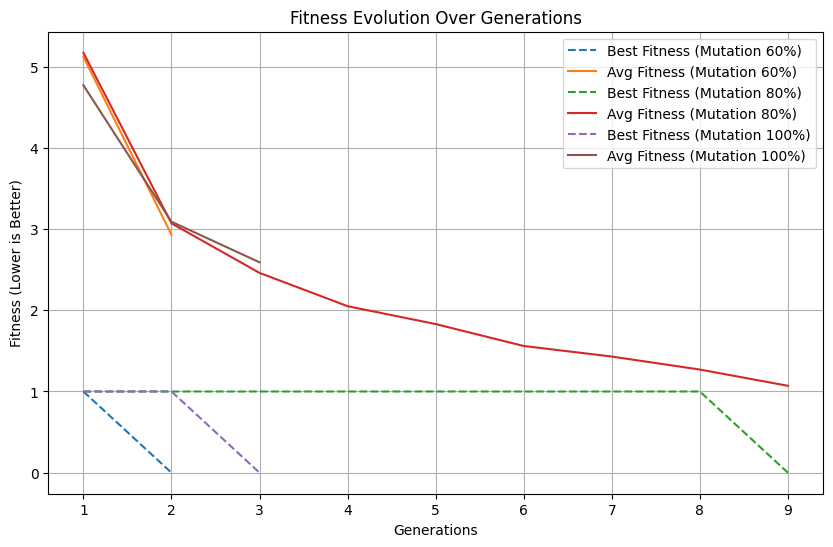

In [48]:
plt.figure(figsize=(10, 6))

for label, (best_fitness, avg_fitness) in results.items():
    generations = range(1, len(best_fitness) + 1)  # Ensure correct x-axis
    plt.plot(generations, best_fitness, label=f"Best Fitness ({label})", linestyle='dashed')
    plt.plot(generations, avg_fitness, label=f"Avg Fitness ({label})")

plt.xlabel("Generations")
plt.ylabel("Fitness (Lower is Better)")
plt.title("Fitness Evolution Over Generations")
plt.legend()
plt.grid(True)
plt.show()
